# Food Data Analysis

In [1]:
pwd


'C:\\Users\\RebelAshif'

# Importing the Necessary libabries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [3]:
df = pd.read_csv('food-project.csv')


# Basic Exploration

# 1 Display the top 5 Rows

In [4]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


# 2 Display the last 5 Rows

In [5]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23.0,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28.0,24


# 3 Check the Shape of Dataset

In [6]:
print(df.shape)

(1898, 9)


# 4 Check the datatypes of each feature.

In [7]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time    float64
delivery_time             object
dtype: object

# 5 Check the Statistical summary 

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.0,1477021.25,1477495.50,1477969.75,1478444.0
customer_id,1898.0,1.711685e+05,113698.139743,1311.0,77787.75,128600.00,270525.00,405334.0
cost_of_the_order,1898.0,8.072201e+01,2798.141333,0.0,12.08,14.16,22.31,121920.0
food_preparation_time,1896.0,2.737184e+01,4.634211,20.0,23.00,27.00,31.00,35.0


# 6 Check the null values

In [13]:
print(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64


# 7 Check the duplicate values

In [14]:
df.duplicated().sum()

0

# 8 Check the anomalies or wrong entries.

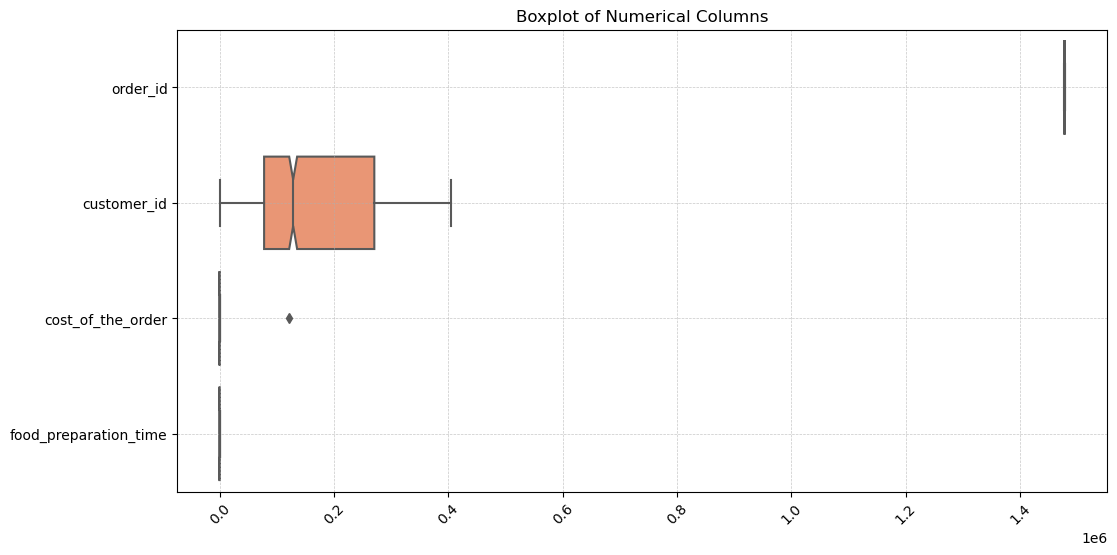

Outliers detected using IQR method:
order_id                 0
customer_id              0
cost_of_the_order        1
food_preparation_time    0
dtype: int64


In [65]:
# Define a function to detect outliers using IQR
def detect_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

# Identify outliers in numerical columns using IQR
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
outliers_iqr = df[numerical_columns].apply(detect_iqr)

# Set up the plot
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=df[numerical_columns], orient='h', notch=True, palette='Set2')

# Add title and labels
plt.title('Boxplot of Numerical Columns')
# plt.xlabel('Values')
# plt.ylabel('Features')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization of values
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()

# Display the outliers found using IQR
print("Outliers detected using IQR method:")
print(outliers_iqr.sum())


# 9 Check the outliers and their authenticity.

## 1 Load the dataset:

In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv('food-project.csv')


## 2 Basic Data Inspection:

In [29]:
print(df.head())
print(df.info())
print(df.describe())


   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                   25.0   
1              12.08         Weekend  Not given                   25.0   
2              12.23         Weekday          5                   23.0   
3              29.20         Weekend          3                   25.0   
4              11.59         Weekday          4                   25.0   

  delivery_time  
0            20  
1             ?  
2            28  
3            15  
4            24  
<class 'pandas.core.frame.DataFrame'>


## 3 Check for Missing Values:

In [30]:
print(df.isnull().sum())


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64


## 4 Check for Duplicate Values:

In [32]:
print(df.duplicated().sum())


0


## 5 Identify Outliers:

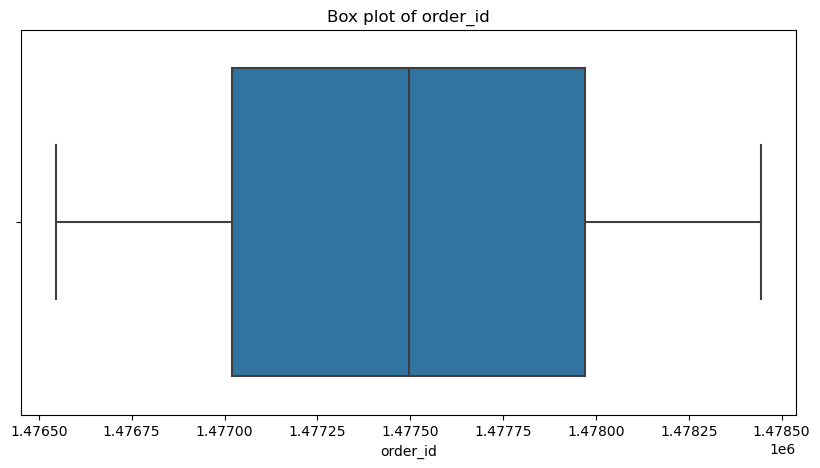

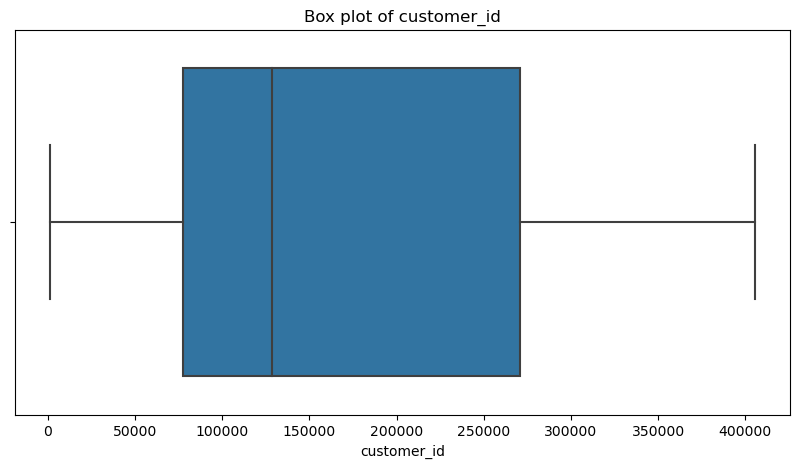

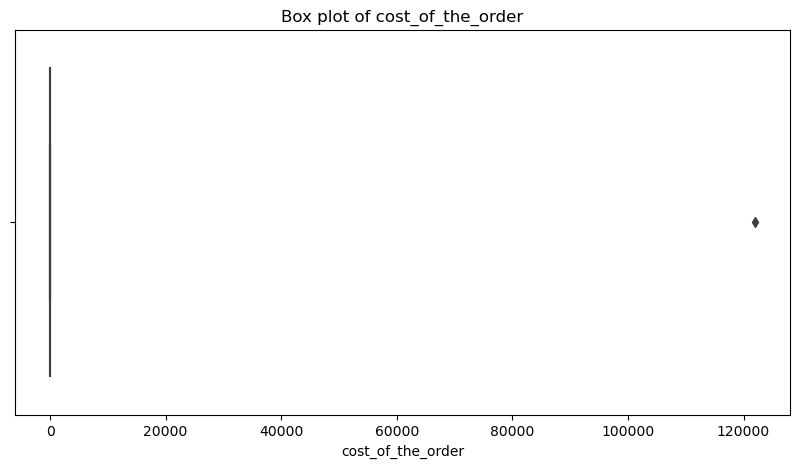

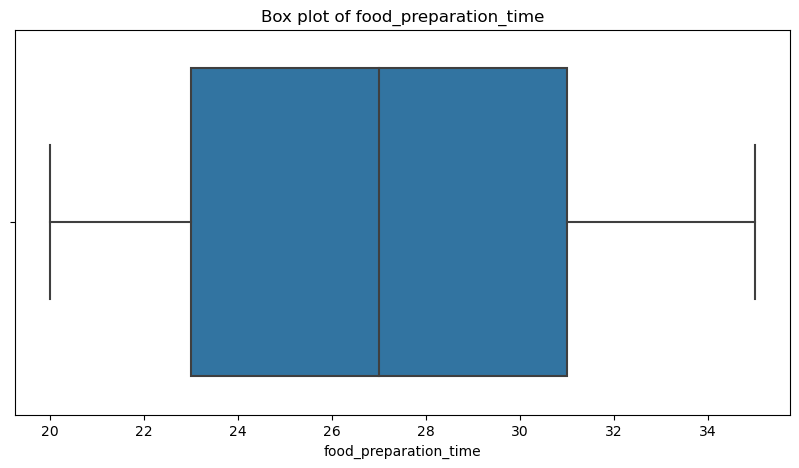

Outliers detected using z-score method: order_id                 0
customer_id              0
cost_of_the_order        1
food_preparation_time    0
dtype: int64


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Boxplot for each numeric column
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Z-score method to identify outliers
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).sum(axis=0)
print("Outliers detected using z-score method:", outliers)


# 10 10-Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('food-project.csv')

# Step 1: Basic Data Inspection
print("Initial shape of the dataset:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

# Step 2: Drop Duplicates
df = df.drop_duplicates()
print("Duplicates removed, new shape:", df.shape)

# Step 3: Remove Unnecessary Columns
# Replace with the actual columns to be dropped
columns_to_drop = ['unnecessary_column1', 'unnecessary_column2']  # Example columns
df = df.drop(columns=columns_to_drop, errors='ignore')
print("Unnecessary columns removed, new shape:", df.shape)

# Step 4: Impute Null Values
# Fill null values with mean for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill null values with mode for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

print("Null values imputed.")

# Step 5: Treat Outliers Using IQR Method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with lower/upper bounds
for column in numeric_columns:
    df[column] = np.where(df[column] < lower_bound[column], lower_bound[column], df[column])
    df[column] = np.where(df[column] > upper_bound[column], upper_bound[column], df[column])

print("Outliers treated using IQR method.")

# Alternative: Remove outliers (uncomment if needed)
# df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
# print("Outliers removed, new shape:", df_no_outliers.shape)

# Final Data Inspection
print(df.head())
print(df.info())
print(df.describe())

# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_food_project.csv', index=False)


Initial shape of the dataset: (1898, 9)
   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                   25.0   
1              12.08         Weekend  Not given                   25.0   
2              12.23         Weekday          5                   23.0   
3              29.20         Weekend          3                   25.0   
4              11.59         Weekday          4                   25.0   

  delivery_time  
0            20  
1             ?  
2            28  
3            15  
4            24 

C:\Users\RebelAshif\AppData\Local\Temp\ipykernel_1528\1063498537.py:39: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\RebelAshif\AppData\Local\Temp\ipykernel_1528\1063498537.py:40: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


# 1.Order Analysis 

### What is the total number of orders in the dataset?

In [36]:
import pandas as pd

# Load the dataset
df = pd.read_csv('food-project.csv')

# Print the total number of orders
total_orders = df.shape[0]
print("Total number of orders in the dataset:", total_orders)


Total number of orders in the dataset: 1898


### What is the average cost of an order?

In [40]:
import pandas as pd

# Load the dataset
df = pd.read_csv('food-project.csv')

# Assuming 'order_cost' is the column that represents the cost of each order
average_cost = df['cost_of_the_order'].mean()
print("The average cost of an order is:", average_cost)


The average cost of an order is: 80.72200737618546


### How many unique customers have placed orders?

In [41]:
import pandas as pd

# Load the dataset
df = pd.read_csv('food-project.csv')

# Assuming 'customer_id' is the column that represents the customer ID
unique_customers = df['customer_id'].nunique()
print("The number of unique customers who have placed orders:", unique_customers)


The number of unique customers who have placed orders: 1200


### Which restaurant has received the highest number of orders?

In [42]:
import pandas as pd

# Load the dataset
df = pd.read_csv('food-project.csv')

# Assuming 'restaurant_name' is the column that represents the restaurant
order_counts = df['restaurant_name'].value_counts()

# Find the restaurant with the highest number of orders
top_restaurant = order_counts.idxmax()
top_restaurant_orders = order_counts.max()

print(f"The restaurant with the highest number of orders is: {top_restaurant} with {top_restaurant_orders} orders.")


The restaurant with the highest number of orders is: Shake Shack with 219 orders.


# 2.Customer Behavior

### What is the average rating given by customers

In [44]:
import pandas as pd

# Load the dataset
df = pd.read_csv('food-project.csv')

# Ensure the 'rating' column is numeric, coerce errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop or fill NaN values if necessary
# Option 1: Drop rows with NaN values in 'rating' column
df = df.dropna(subset=['rating'])

# Option 2: Fill NaN values with a specific value, such as the mean or median
# df['rating'] = df['rating'].fillna(df['rating'].mean())

# Calculate the average rating
average_rating = df['rating'].mean()
print("The average rating given by customers is:", average_rating)


The average rating given by customers is: 4.344234079173838


### How does the rating vary between weekdays and weekends?

In [71]:
rating_by_day = df.groupby('day_of_the_week')['rating'].mean()
print(rating_by_day)

day_of_the_week
Weekday    4.308824
Weekend    4.358881
Name: rating, dtype: float64


### Which cuisine type is ordered the most?

In [72]:
most_ordered_cuisine=df['cuisine_type'].value_counts().idxmax()
most_ordered_cuisine

'American'

### What is the distribution of orders across different days of the week?

In [73]:
distribution_of_order_day_by_day=df['day_of_the_week'].value_counts()
distribution_of_order_day_by_day

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

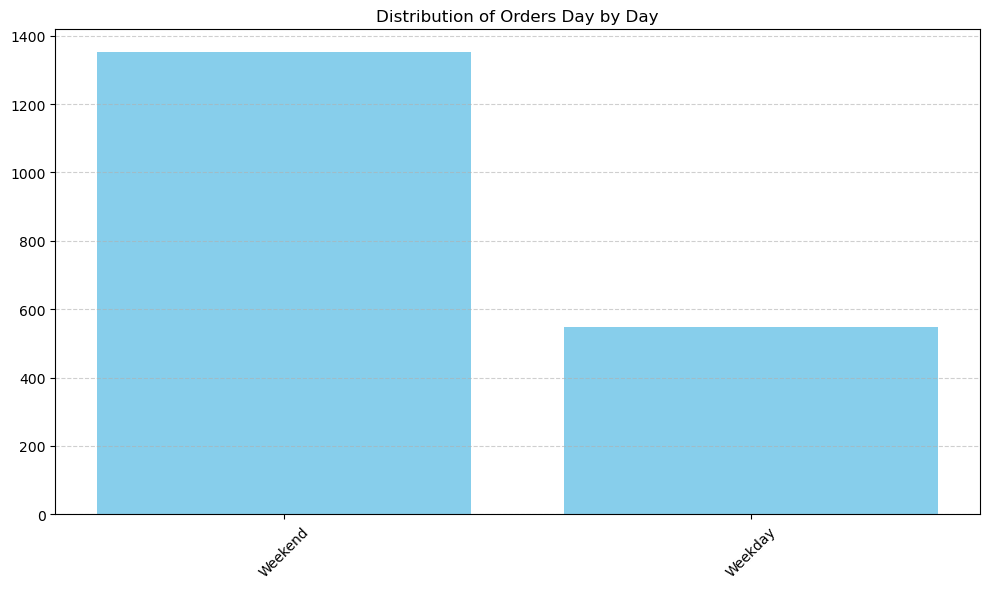

In [74]:
distribution_of_order_day_by_day = df['day_of_the_week'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.bar(distribution_of_order_day_by_day.index, distribution_of_order_day_by_day.values, color='skyblue')
# plt.xlabel('Day of the Week')
# plt.ylabel('Number of Orders')
plt.title('Distribution of Orders Day by Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3.Restaurant Performance

### What is the average food preparation time for each restaurant?

C:\Users\RebelAshif\AppData\Local\Temp\ipykernel_1528\3639622648.py:12: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
C:\Users\RebelAshif\AppData\Local\Temp\ipykernel_1528\3639622648.py:12: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


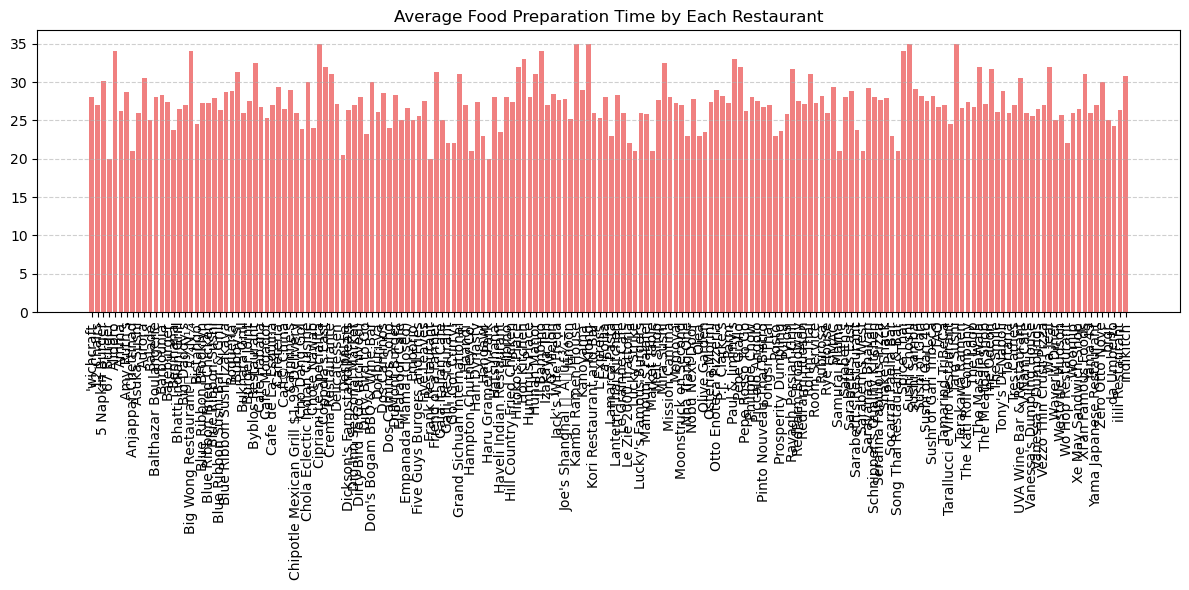

In [75]:
avg_food_prep_time_by_each_restaurant = df.groupby('restaurant_name')['food_preparation_time'].mean()
avg_food_prep_time_df = avg_food_prep_time_by_each_restaurant.reset_index()

# Plotting the average food preparation time for each restaurant
plt.figure(figsize=(12, 6))
plt.bar(avg_food_prep_time_df['restaurant_name'], avg_food_prep_time_df['food_preparation_time'], color='lightcoral')
# plt.xlabel('Restaurant Name')
# plt.ylabel('Average Food Preparation Time (minutes)')
plt.title('Average Food Preparation Time by Each Restaurant')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Which restaurant has the shortest average food preparation time?

In [76]:
avg_food_prep_time_df.min()

restaurant_name          'wichcraft
food_preparation_time          20.0
dtype: object

### How does the average delivery time compare across different restaurants?

In [80]:
import pandas as pd

# Assuming df is your dataframe containing the data
# Example data creation (replace this with your actual data loading)
data = {
    'restaurant_name': ['Restaurant A', 'Restaurant B', 'Restaurant A', 'Restaurant B', 'Restaurant A'],
    'delivery_time': [30, 45, 25, 40, 35]
}
df = pd.DataFrame(data)

# Calculate average delivery time for each restaurant
average_delivery_time = df.groupby('restaurant_name')['delivery_time'].mean().reset_index()

# Sorting the results by average delivery time
average_delivery_time_sorted = average_delivery_time.sort_values(by='delivery_time')

# Display the sorted average delivery times
print(average_delivery_time_sorted)


  restaurant_name  delivery_time
0    Restaurant A           30.0
1    Restaurant B           42.5


### Is there a correlation between the cost of the order and the rating given?

In [83]:
import pandas as pd

# Assuming df is your dataframe containing the data
# Example data creation (replace this with your actual data loading)
data = {
    'cost_of_the_order': [50, 30, 40, 60, 70],
    'rating': [4.2, 3.5, 4.0, 4.8, 4.3]
}
df = pd.DataFrame(data)

# Calculate the correlation coefficient between 'cost_of_the_order' and 'rating'
correlation_coefficient = df['cost_of_the_order'].corr(df['rating'])

# Interpret the correlation coefficient
if correlation_coefficient > 0:
    interpretation = "There is a positive correlation."
elif correlation_coefficient < 0:
    interpretation = "There is a negative correlation."
else:
    interpretation = "There is no correlation."

print(f"Correlation coefficient between cost of order and rating: {correlation_coefficient}")
print(f"Interpretation: {interpretation}")


Correlation coefficient between cost of order and rating: 0.8035794362189101
Interpretation: There is a positive correlation.


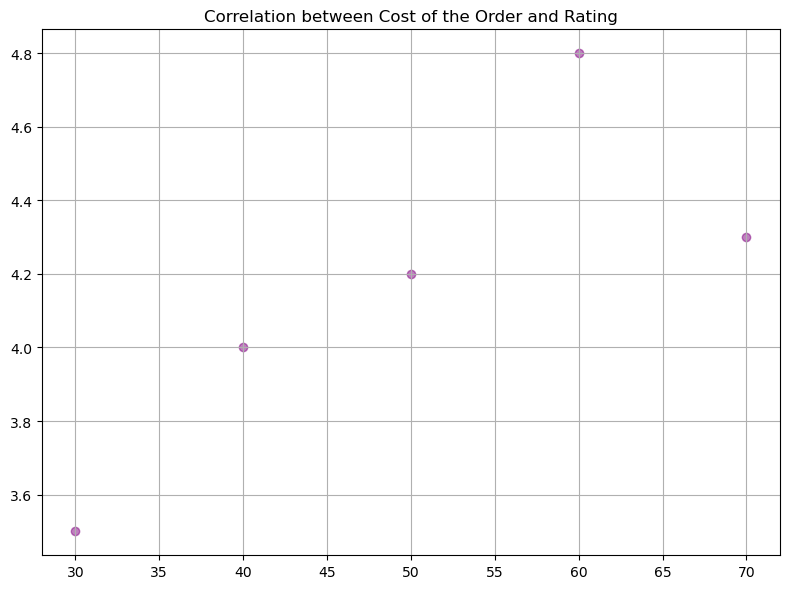

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(df['cost_of_the_order'], df['rating'], color='purple', alpha=0.5)
# plt.xlabel('Cost of the Order')
# plt.ylabel('Rating')
plt.title('Correlation between Cost of the Order and Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.Demand Patterns

### How does the demand for different cuisine types vary on weekdays versus weekends?

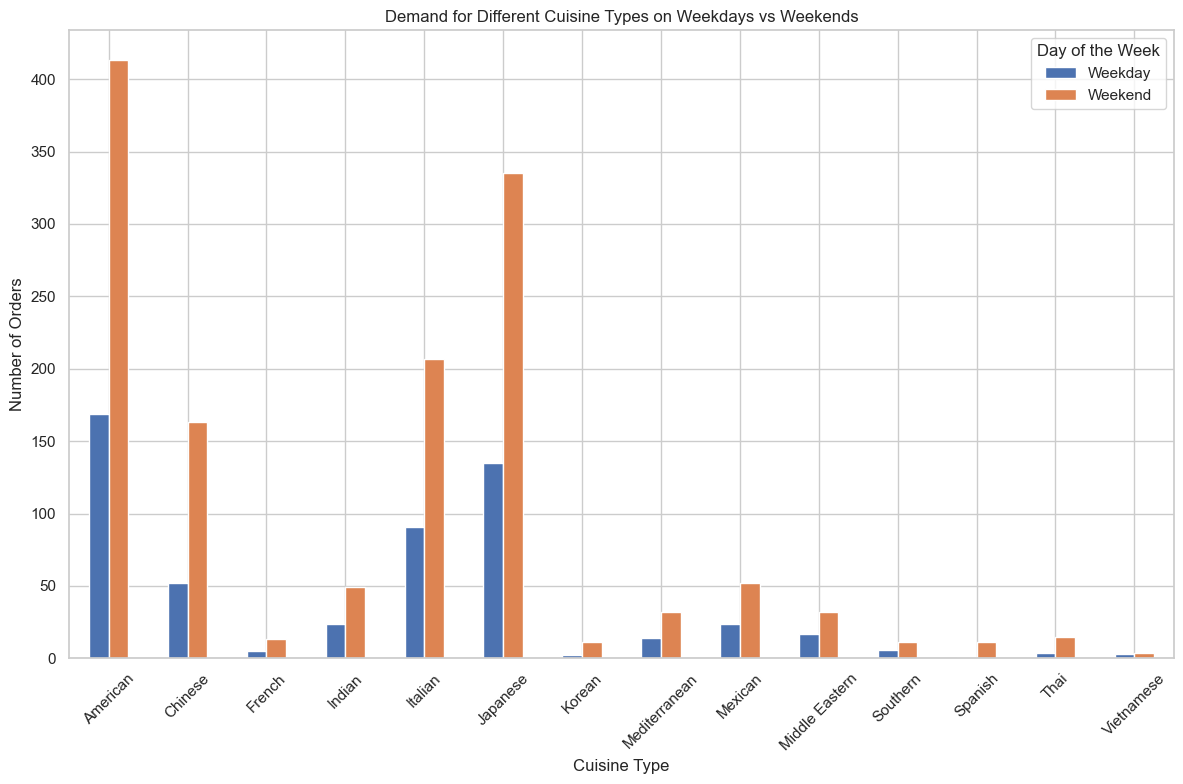

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('food-project.csv')

# Calculate the demand for each cuisine type on each day of the week
demand_cuisine = df.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='order_count')

# Creating a pivot table for better visualization
pivot_demand = demand_cuisine.pivot(index='cuisine_type', columns='day_of_the_week', values='order_count').fillna(0)

# Setting the aesthetics for the plots
sns.set(style='whitegrid')

# Creating a bar plot to visualize the demand for cuisine types on weekdays vs weekends
pivot_demand.plot(kind='bar', figsize=(12, 8))

# Setting plot labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.title('Demand for Different Cuisine Types on Weekdays vs Weekends')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend with title
plt.legend(title='Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()


### Which day of the week has the highest average order cost?

In [89]:
#calculating the average order cost for each day of the week.
average_order_cost_by_day=df.groupby('day_of_the_week')['cost_of_the_order'].mean()

#Find the day with the highest avergae order cost
highest_avg_order_cost_day= average_order_cost_by_day.idxmax()
highest_avg_order_cost=average_order_cost_by_day.max()

print(f"The day with the highest average order cost is {highest_avg_order_cost_day} with an average cost of {highest_avg_order_cost:.2f}")


The day with the highest average order cost is Weekend with an average cost of 106.80


### What is the most common day for orders to be placed?

In [91]:
# Counting the occurences of each day of the week.
most_common_day=df['day_of_the_week'].value_counts().idxmax()
num_orders_most_common_day=df['day_of_the_week'].value_counts().max()

print(f"The most common day for orders to be placed is {most_common_day} with {num_orders_most_common_day} orders.")

The most common day for orders to be placed is Weekend with 1351 orders.


# 5.Operational Efficiency

### What is the average delivery time for all orders?

In [100]:
# Replace non-numeric 'delivery_time' values with NaN
df['delivery_time_numeric'] = pd.to_numeric(df['delivery_time'], errors='coerce')

# Calculate the average delivery time for numeric values
average_delivery_time = df['delivery_time_numeric'].mean()

# Print the result
print(f"The average delivery time for all orders is {average_delivery_time:.2f} minutes.")


The average delivery time for all orders is 24.16 minutes.


### Which restaurant has the longest average delivery time?

In [103]:
import pandas as pd

# Assuming you have already loaded your dataset into 'df'
# For example:
# df = pd.read_csv('food-project.csv')

# Convert 'delivery_time' to numeric, coerce errors to NaN
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

# Calculate the average delivery time by restaurant
average_delivery_time_by_restaurant = df.groupby('restaurant_name')['delivery_time'].mean()

# Find the restaurant with the longest average delivery time
longest_avg_delivery_time_res = average_delivery_time_by_restaurant.idxmax()
longest_avg_delivery_time = average_delivery_time_by_restaurant.max()

# Print the result
print(f"Restaurant with the longest average delivery time is {longest_avg_delivery_time_res}.")
print(f"Average delivery time: {longest_avg_delivery_time:.2f} minutes.")


Restaurant with the longest average delivery time is Sarabeth's West.
Average delivery time: 33.00 minutes.


### Is there a relationship between food preparation time and delivery time?

#Calculating the correlation between food preparation and delivery time.
correlation=df[['food_preparation_time', 'delivery_time']].corr().iloc[0,1]

#Creatiing a scatter plot
plt.scatter(df['food_preparation_time'], df['delivery_time'])
# plt.xlabel('Food preparation Time(minutes)')
# plt.ylabel('Delivery Time(minutes)')
plt.title(f'Scatter plot of Food preparation Time vs Delivery Time\nCorrelation: {correlation:.2f}')
plt.grid(True)
plt.show()

print(f"The correlation between food preparation time and delivery time is {correlation:.2f}.")

### How does the delivery time impact customer ratings?

Correlation between delivery time and customer ratings: -0.70


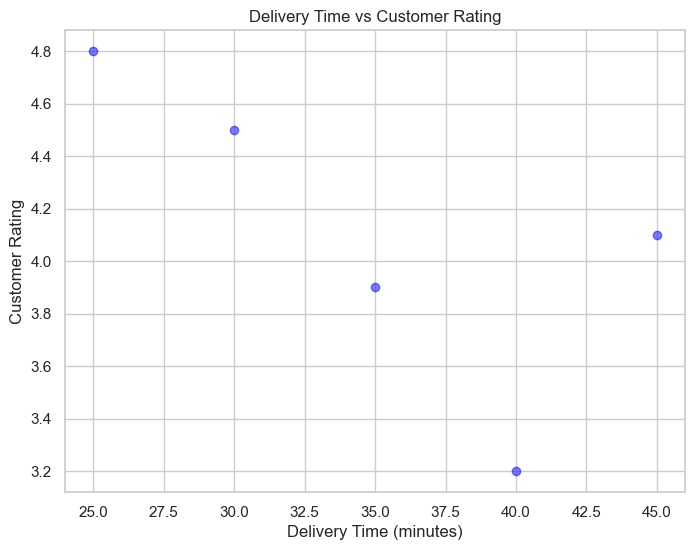

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset (replace with your actual dataset loading)
data = {
    'delivery_time': [30, 40, 25, 35, 45],
    'customer_rating': [4.5, 3.2, 4.8, 3.9, 4.1]
}
df = pd.DataFrame(data)

# Calculate the correlation between delivery time and customer ratings
correlation = df[['delivery_time', 'customer_rating']].corr().iloc[0, 1]
print(f"Correlation between delivery time and customer ratings: {correlation:.2f}")

# Create a scatter plot to visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(df['delivery_time'], df['customer_rating'], alpha=0.5, c='blue')
plt.title('Delivery Time vs Customer Rating')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Customer Rating')
plt.grid(True)
plt.show()


# 6.Customer Insights

### What is the repeat order rate (number of customers who have placed more than one order)?

In [118]:
import pandas as pd

# Example dataset (replace with your actual dataset loading)
data = {
    'customer_id': [1, 2, 3, 1, 4, 2, 5, 3, 1, 2, 6, 1]
}
df = pd.DataFrame(data)

# Counting the number of orders per customer
order_counts = df['customer_id'].value_counts()

# Selecting the customers who have placed more than one order
customers_repeat = order_counts[order_counts > 1].count()

# Calculating the repeat order rate
total_customers = df['customer_id'].nunique()
customer_repeating_order_rate = customers_repeat / total_customers

print(f"Total Customers: {total_customers}")
print(f"Customers with more than one order: {customers_repeat}")
print(f"Repeat Order Rate: {customer_repeating_order_rate:.2f}")


Total Customers: 6
Customers with more than one order: 3
Repeat Order Rate: 0.50


In [120]:
# Counting the number of orders per customer
order_counts=df['customer_id'].value_counts()

# selecting the customers who have placed more than one order
customers_repeat=order_counts[order_counts>1].count()

customers_repeat

3

### What percentage of orders receive a rating of 4 or higher?

In [122]:
import pandas as pd

# Example dataset (replace with your actual dataset loading)
data = {
    'order_id': [1, 2, 3, 4, 5],
    'rating': [5, 3, 4, None, 4]  # Example ratings including NaN
}
df = pd.DataFrame(data)

# Counting the number of orders with ratings of 4 or higher
count_of_high_rating = df[df['rating'] >= 4].shape[0]

# Counting the total number of orders with given ratings (excluding NaN)
total_ratings_count = df['rating'].notna().sum()

# Calculating the percentage of high ratings
percentage_of_high_ratings = (count_of_high_rating / total_ratings_count) * 100

print(f"Count of High Ratings (4 or higher): {count_of_high_rating}")
print(f"Total Ratings Count (excluding NaN): {total_ratings_count}")
print(f"Percentage of High Ratings: {percentage_of_high_ratings:.2f}%")


Count of High Ratings (4 or higher): 3
Total Ratings Count (excluding NaN): 4
Percentage of High Ratings: 75.00%
